In [1]:
import numpy as np                                            
import pandas as pd   
import seaborn as sns
import matplotlib.pyplot as plt                             
from sklearn.linear_model import LogisticRegression         
from sklearn.model_selection import cross_val_score           
from sklearn.ensemble import RandomForestClassifier 

In [2]:
titanic_df = pd.read_csv("train.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.shape

(891, 12)

In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Text(0, 0.5, 'Frequency')

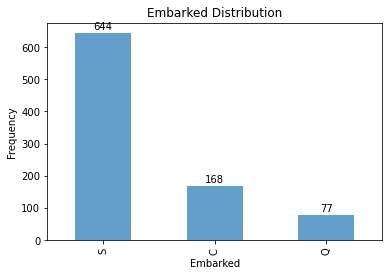

In [5]:
ax = titanic_df['Embarked'].value_counts().plot(kind='bar', alpha=0.7)
rects = ax.patches
labels = ["%d" % i for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, height,
            ha='center', va='bottom')
plt.title('Embarked Distribution')
plt.xlabel('Embarked')
plt.ylabel('Frequency')

In [8]:
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')

Text(0, 0.5, 'Normalized Count')

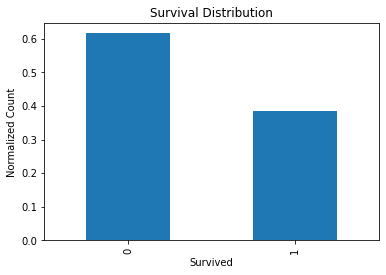

In [7]:
titanic_df['Survived'].value_counts(normalize=True).plot(kind='bar')
plt.title('Survival Distribution')
plt.xlabel('Survived')
plt.ylabel('Normalized Count')

Text(0, 0.5, 'Normalized Count')

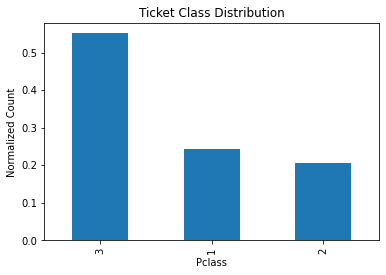

In [9]:
titanic_df['Pclass'].value_counts(normalize=True).plot(kind='bar')
plt.title('Ticket Class Distribution')
plt.xlabel('Pclass')
plt.ylabel('Normalized Count')

Text(0, 0.5, 'Normalized Count')

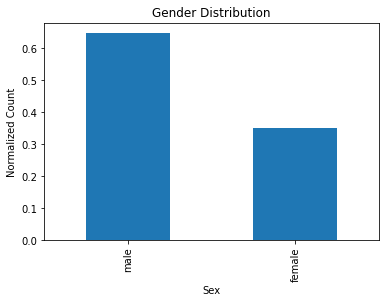

In [10]:
titanic_df['Sex'].value_counts(normalize=True).plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Normalized Count')

Text(0, 0.5, 'Normalized Count')

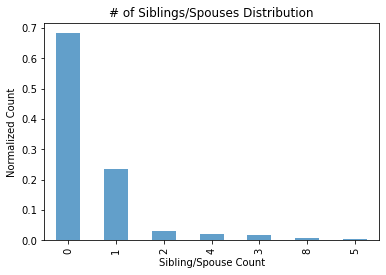

In [11]:
titanic_df['SibSp'].value_counts(normalize=True).plot(kind='bar', alpha=0.7)
plt.title('# of Siblings/Spouses Distribution')
plt.xlabel('Sibling/Spouse Count')
plt.ylabel('Normalized Count')

Text(0, 0.5, 'Normalized Count')

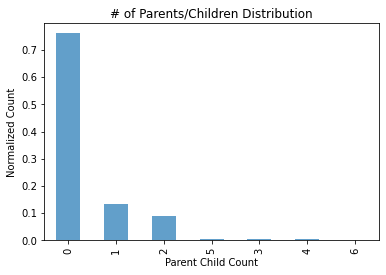

In [12]:
titanic_df['Parch'].value_counts(normalize=True).plot(kind='bar', alpha=0.7)
plt.title('# of Parents/Children Distribution')
plt.xlabel('Parent Child Count')
plt.ylabel('Normalized Count')

Text(0, 0.5, 'Frequency')

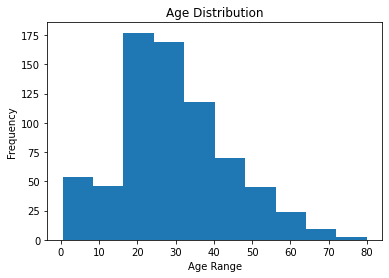

In [13]:
titanic_df['Age'].plot(kind='hist')
plt.title('Age Distribution')
plt.xlabel('Age Range')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

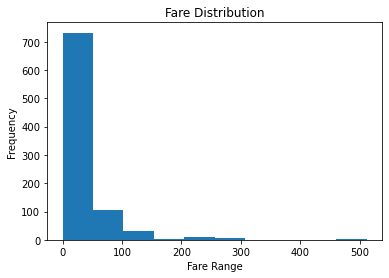

In [14]:
titanic_df['Fare'].plot(kind='hist')
plt.title('Fare Distribution')
plt.xlabel('Fare Range')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Age vs Female vs Class3')

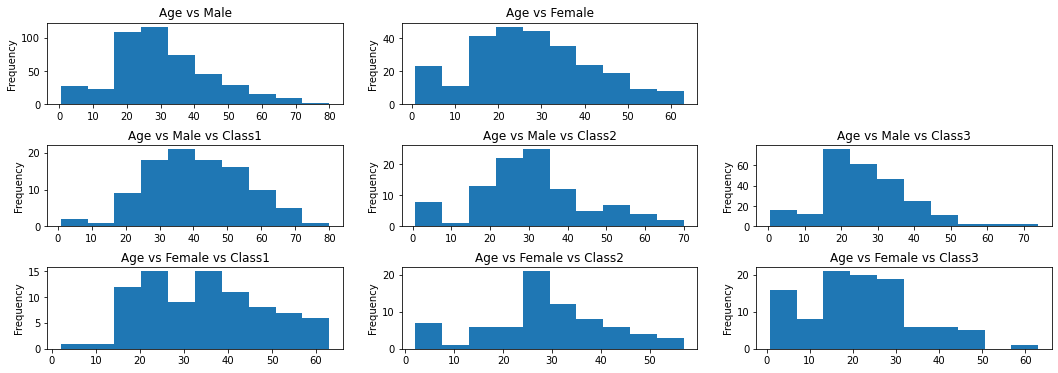

In [15]:
fig = plt.figure(figsize=(18,6))
plt.subplots_adjust(hspace=.5)

plt.subplot2grid((3,3), (0,0))
titanic_df['Age'][(titanic_df['Sex']=='male')].plot(kind='hist')
plt.title('Age vs Male')
plt.subplot2grid((3,3), (0,1))
titanic_df['Age'][(titanic_df['Sex']=='female')].plot(kind='hist')
plt.title('Age vs Female')
plt.subplot2grid((3,3), (1,0))
titanic_df['Age'][(titanic_df['Sex']=='male') & (titanic_df['Pclass']==1)].plot(kind='hist')
plt.title('Age vs Male vs Class1')
plt.subplot2grid((3,3), (1,1))
titanic_df['Age'][(titanic_df['Sex']=='male') & (titanic_df['Pclass']==2)].plot(kind='hist')
plt.title('Age vs Male vs Class2')
plt.subplot2grid((3,3), (1,2))
titanic_df['Age'][(titanic_df['Sex']=='male') & (titanic_df['Pclass']==3)].plot(kind='hist')
plt.title('Age vs Male vs Class3')
plt.subplot2grid((3,3), (2,0))
titanic_df['Age'][(titanic_df['Sex']=='female') & (titanic_df['Pclass']==1)].plot(kind='hist')
plt.title('Age vs Female vs Class1')
plt.subplot2grid((3,3), (2,1))
titanic_df['Age'][(titanic_df['Sex']=='female') & (titanic_df['Pclass']==2)].plot(kind='hist')
plt.title('Age vs Female vs Class2')
plt.subplot2grid((3,3), (2,2))
titanic_df['Age'][(titanic_df['Sex']=='female') & (titanic_df['Pclass']==3)].plot(kind='hist')
plt.title('Age vs Female vs Class3')

In [16]:
titanic_df["Age"] = titanic_df.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

Text(0, 0.5, 'Survived Frequency (Normalized)')

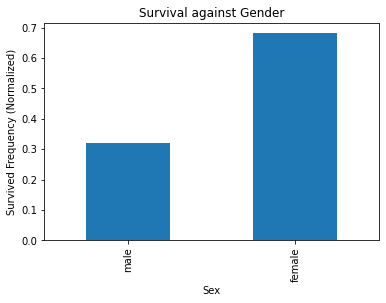

In [18]:
titanic_df['Sex'][titanic_df['Survived']==1].value_counts(normalize=True, ascending=True).plot(kind='bar')
plt.title('Survival against Gender')
plt.xlabel('Sex')
plt.ylabel('Survived Frequency (Normalized)')

Text(0.5, 1.0, 'Ticket Class vs Survival')

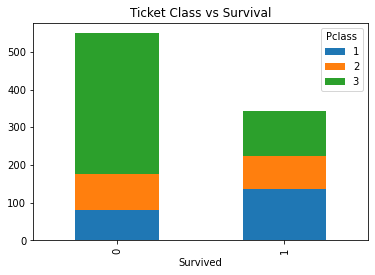

In [19]:
titanic_df.groupby(['Survived', 'Pclass']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Ticket Class vs Survival')

Text(0, 0.5, 'Count')

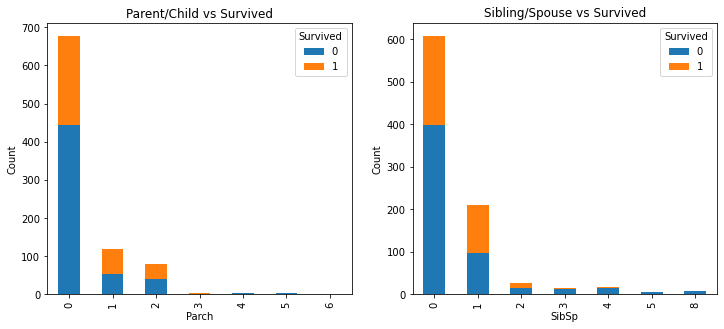

In [20]:
fig = plt.figure(figsize=(12,5))
plt.subplots_adjust(hspace=.5)

ax = plt.subplot2grid((1,2), (0,0))
titanic_df.groupby(['Parch', 'Survived']).size().unstack().plot(kind='bar', stacked=True, ax=ax)
plt.title('Parent/Child vs Survived')
plt.ylabel('Count')

ax = plt.subplot2grid((1,2), (0,1))
titanic_df.groupby(['SibSp', 'Survived']).size().unstack().plot(kind='bar', stacked=True, ax=ax)
plt.title('Sibling/Spouse vs Survived')
plt.ylabel('Count')

In [21]:
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

Text(0.5, 1.0, 'Family vs Survival')

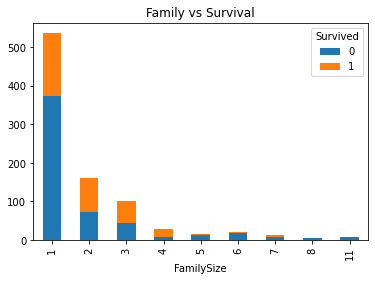

In [22]:
titanic_df.groupby(['FamilySize', 'Survived']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Family vs Survival')


In [23]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [24]:
test = pd.read_csv('test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [25]:
test["Age"] = test.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))
test["Fare"] = test["Fare"].fillna(test["Fare"].dropna().median())   
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  FamilySize   418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [27]:
X_train = titanic_df[['Pclass','Sex', 'Age', 'Fare', 'Embarked', 'FamilySize']]
X_test = test[['Pclass','Sex', 'Age', 'Fare', 'Embarked', 'FamilySize']]
labels_to_encode = ['Pclass', 'Sex', 'Embarked']
for label in labels_to_encode:
    X_train = X_train.join(pd.get_dummies(X_train[label], prefix = label))
    X_train.drop(label, axis=1, inplace=True)
for label in labels_to_encode:
    X_test = X_test.join(pd.get_dummies(X_test[label], prefix = label))
    X_test.drop(label, axis=1, inplace=True)
y = titanic_df['Survived'].values

In [28]:
lr_model =  LogisticRegression(solver='liblinear')

In [29]:
scores = cross_val_score(lr_model, X_train, y, cv=5)
print(round(np.mean(scores*100)))
lr_model.fit(X_train,y)
predictions_lr = lr_model.predict(X_test)
submission_lr = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": predictions_lr
})
submission_lr.to_csv('titanic_lr.csv', index=False)

80


In [30]:
rfclr = RandomForestClassifier(n_estimators=100, max_depth = 7)
scores = cross_val_score(rfclr, X_train, y, cv=5)
print(round(np.mean(scores*100)))
rfclr.fit(X_train, y)
predictions_rf = rfclr.predict(X_test)
submission_rf = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": predictions_rf
})

82
